# Validation

Calculations related to hand validation of our results.

## Read data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

gsheet = 'https://docs.google.com/spreadsheets/d/1i89xEmIAaPQa2DKAxvoVlLNAlst2R7EwC0v0pqVpdF0/export?format=csv'
df = pd.read_csv(gsheet, index_col='book_id')

ids_to_drop = [
    '2010_Haldeman,Joe_Starbound_SF', # sci-fi
]

manual_cols = ['dist_miles', 'manual_distance_gpe_sequences', 'manual_distance_yourLocations', 'manual_mobility_rating']
df.drop(index=ids_to_drop, inplace=True)
df.dropna(subset=manual_cols, inplace=True)

## Correlations

In [2]:
# pearson correlation between hand distance and algorithm distance
results = smf.ols('manual_distance_yourLocations ~ dist_miles', data=df).fit()
results.summary()

/Users/mwilkens/opt/miniforge3/envs/mobility/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     manual_distance_yourLocations   R-squared:                       0.141
Model:                                       OLS   Adj. R-squared:                  0.033
Method:                            Least Squares   F-statistic:                     1.310
Date:                           Sat, 04 Nov 2023   Prob (F-statistic):              0.285
Time:                                   14:59:01   Log-Likelihood:                -105.31
No. Observations:                             10   AIC:                             214.6
Df Residuals:                                  8   BIC:                             215.2
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    149.2935   5924.567      0.025      0.981   -1.35e+04    1.38e+04
dist_miles     1.1947      1.044      1.145      0.285      -1.212       3.602
==============================================================================
Omnibus:                        5.956   Durbin-Watson:                   2.690
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                2.448
Skew:                           1.183   Prob(JB):                        0.294
Kurtosis:                       3.523   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [3]:
# spearman correlation between hand distance and algorithm distance
results = smf.ols('manual_distance_yourLocations ~ dist_miles', data=df.rank()).fit()
results.summary()

/Users/mwilkens/opt/miniforge3/envs/mobility/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     manual_distance_yourLocations   R-squared:                       0.001
Model:                                       OLS   Adj. R-squared:                 -0.124
Method:                            Least Squares   F-statistic:                  0.007353
Date:                           Sat, 04 Nov 2023   Prob (F-statistic):              0.934
Time:                                   14:59:01   Log-Likelihood:                -24.736
No. Observations:                             10   AIC:                             53.47
Df Residuals:                                  8   BIC:                             54.08
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3333      2.193      2.432      0.041       0.277      10.390
dist_miles     0.0303      0.353      0.086      0.934      -0.785       0.845
==============================================================================
Omnibus:                        1.215   Durbin-Watson:                   2.212
Prob(Omnibus):                  0.545   Jarque-Bera (JB):                0.677
Skew:                          -0.006   Prob(JB):                        0.713
Kurtosis:                       1.725   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/mwilkens/opt/miniforge3/envs/mobility/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/xd/m092nj891q71xlv9zcn1sd8r0000gn/T/ipykernel_36490/2606261992.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


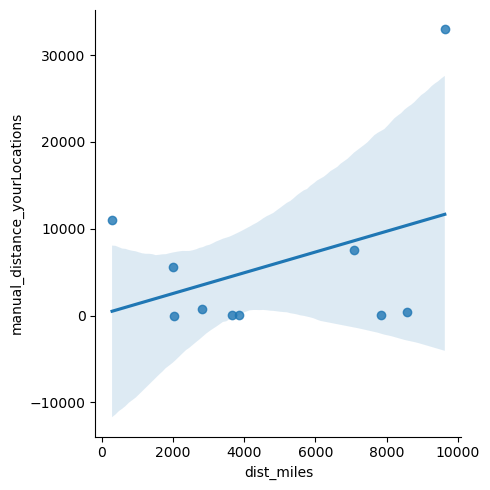

In [4]:
# plot
sns.lmplot(x='dist_miles', y='manual_distance_yourLocations', data=df)
plt.tight_layout()
plt.show()

## Group stats

In [5]:
df.groupby('manual_mobility_rating')[manual_cols].describe().T

manual_mobility_rating                        2.0          3.0          4.0  \
dist_miles                    count      3.000000     3.000000     1.000000   
                              mean    4752.749022  4830.135739  1990.648474   
                              std     3404.431003  2656.679513          NaN   
                              min     2024.535100  2804.565522  1990.648474   
                              25%     2845.156166  3326.152962  1990.648474   
                              50%     3665.777231  3847.740403  1990.648474   
                              75%     6116.855983  5842.920847  1990.648474   
                              max     8567.934735  7838.101292  1990.648474   
manual_distance_gpe_sequences count      3.000000     3.000000     1.000000   
                              mean    4260.243333  1106.166667  2446.160000   
                              std     5447.718598  1518.607914          NaN   
                              min      442.000000    35.000000  2446.160000   
                              25%     1141.000000   237.205000  2446.160000   
                              50%     1840.000000   439.410000  2446.160000   
                              75%     6169.365000  1641.750000  2446.160000   
                              max    10498.730000  2844.090000  2446.160000   
manual_distance_yourLocations count      3.000000     3.000000     1.000000   
                              mean     181.280000   271.266667  5642.770000   
                              std      225.532515   427.273324          NaN   
                              min        0.000000    19.200000  5642.770000   
                              25%       55.000000    24.600000  5642.770000   
                              50%      110.000000    30.000000  5642.770000   
                              75%      271.920000   397.300000  5642.770000   
                              max      433.840000   764.600000  5642.770000   
manual_mobility_rating        count      3.000000     3.000000     1.000000   
                              mean       2.000000     3.000000     4.000000   
                              std        0.000000     0.000000          NaN   
                              min        2.000000     3.000000     4.000000   
                              25%        2.000000     3.000000     4.000000   
                              50%        2.000000     3.000000     4.000000   
                              75%        2.000000     3.000000     4.000000   
                              max        2.000000     3.000000     4.000000   

manual_mobility_rating                        5.0  
dist_miles                    count      3.000000  
                              mean    5670.566571  
                              std     4832.616294  
                              min      287.246003  
                              25%     3688.522041  
                              50%     7089.798078  
                              75%     8362.226855  
                              max     9634.655632  
manual_distance_gpe_sequences count      3.000000  
                              mean    3646.940000  
                              std     3710.630521  
                              min      160.000000  
                              25%     1697.045000  
                              50%     3234.090000  
                              75%     5390.410000  
                              max     7546.730000  
manual_distance_yourLocations count      3.000000  
                              mean   17179.823333  
                              std    13780.538979  
                              min     7546.830000  
                              25%     9287.340000  
                              50%    11027.850000  
                              75%    21996.320000  
                              max    32964.790000  
manual_mobility_rating        count      3.000000  
                              mean      